In [5]:
import pandas as panda
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
dataset = panda.read_csv('../levere/NAS.csv')
dataset.dropna(subset=['Open'], inplace=True)
dataset[['Year', 'Month', 'Date']] = dataset.Date.str.split("-",expand=True)

dataset['Date'] = dataset['Year'] + dataset['Date'] + dataset['Month']
dataset['Date'] = dataset['Date'].astype(int)
dataset['Date'] = dataset['Date'].astype(int)

# Date is now an int and with format YYYYDDMM

dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,20031812,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0,2003,12
1,20031912,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0,2003,12
2,20032212,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0,2003,12
3,20032312,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0,2003,12
7,20032912,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0,2003,12
...,...,...,...,...,...,...,...,...,...
4248,20201210,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0,2020,10
4249,20201310,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0,2020,10
4250,20201410,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0,2020,10
4251,20201510,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0,2020,10


In [7]:
input = dataset.drop(columns =['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month'])

input.head(10)

,Date
0,20031812
1,20031912
2,20032212
3,20032312
7,20032912
8,20033012
11,20040201
12,20040501
13,20040601
14,20040701


In [8]:
close = dataset.Close
close.head(10)

0     19.139799
1     18.454201
2     18.054300
3     17.425800
7     17.254400
8     17.711500
11    17.768600
12    17.711500
13    17.597200
14    17.140100
Name: Close, dtype: float64

In [9]:
regObj = linear_model.LinearRegression()
regObj.fit(input, close)

LinearRegression()

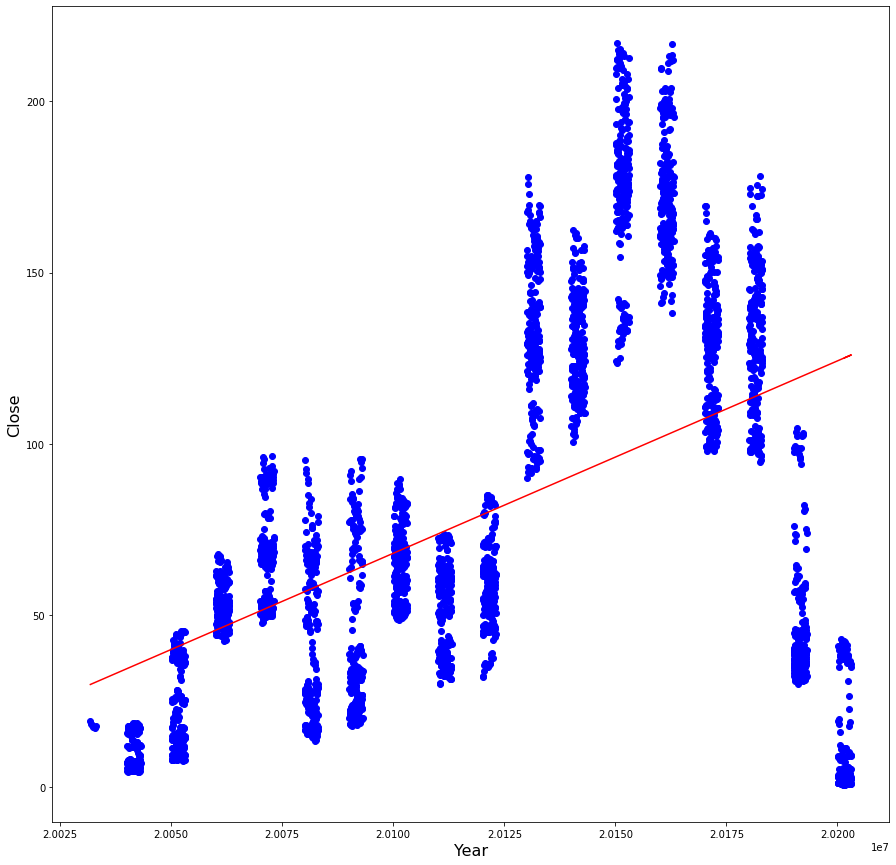

In [10]:
plt.figure(figsize=(15, 15))
plt.xlabel('Year',fontsize=16)
plt.ylabel('Close',fontsize=16)

plt.scatter(dataset.Date, dataset.Close, color='blue')

plt.plot(dataset.Date, regObj.predict(dataset[['Date']]), color='red')

In [11]:
# Date format YYYYDDMM
regObj.predict([[20252210]])

array([153.53446413])

In [12]:
coefficient=regObj.coef_
coefficient

array([0.00056121])

In [13]:
intercept=regObj.intercept_
intercept

-11212.153993405438

In [14]:
coefficient*(2021)+intercept

array([-11211.01979342])